# Inverse Ising problem

This notebook gives examples of how to use the various solvers included in CONIII for solving the inverse Ising problem. In this problem, the goal is to match the average of each spin (the magnetization) $\{\langle\sigma_{\rm i}\rangle\}$ and the pairwise correlations $\{\langle\sigma_{\rm i}\sigma_{\rm j}\rangle\}$ by finding the fields $\{h_{\rm i}\}$ and couplings $\{J_{\rm ij}\}$.

The Ising model is given by  
$p(\{\sigma_{\rm i}\}) = \left.e^{-E(\{\sigma_{\rm i}\})}\right/Z$  
$\displaystyle E(\{\sigma_{\rm i}\}) = -\sum_{\rm ij}J_{\rm ij}\sigma_{\rm i}\sigma_{\rm j} -\sum_{\rm i}^Nh_{\rm i}$  
$Z = \displaystyle \sum_{\{\sigma_{\rm i}\}} e^{-E(\{\sigma_{\rm i}\})}$

In [1]:
# Setup iPython environment.
%pylab inline
plt.rc('font',size=20)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Import common libraries.
from __future__ import division
from solvers import *
from utils import *
import ising_eqn_3_3_sym as ising_eqn_3_sym

# Define common functions.
calc_e,calc_observables,mchApproximation = define_ising_helpers_functions()

# Generate example data set.
n = 3  # system size
np.random.seed(1)
X = random.randint(0,2,size=(100,3))
# X = hstack(( random.randint(0,2,size=(100,2)),zeros((100,1),dtype=int) ))

# X[:,2] = X[:,0]*X[:,1]  # AND rule
# X[:,2] = X[:,0]|X[:,1]  # OR rule
# X[:,2] = X[:,0]!=X[:,1]  # XOR rule

X = X.astype(float)*2-1
# X = vstack((X,X*-1))

In [6]:
allstates = bin_states(n,True)  # all 2^n possible binary states in {-1,1} basis
sisj = pair_corr(X,concat=True)  # magnetizations and pairwise correlations of random sample

# Enumeration example.

Enumerate all constraint equations and solve them using scipy.optimize.minimize. All the equations have been written to the file "ising_eqn_5_sym.py" by calling
>python exact.py 5 1

In this case, the exact (not sampled) $\langle\sigma_{\rm i}\rangle$ and $\langle\sigma_{\rm i}\sigma_{\rm j}\rangle$ are given and the exact solution is found.

In [10]:
sisj = concatenate((pair_corr(X,concat=True),[X.prod(1).mean()]))  # magnetizations and pairwise correlations of random sample

In [11]:
# Declare and call solver.
solver = Exact(n,
               calc_observables_multipliers=ising_eqn_3_sym.calc_observables,
               calc_observables=calc_observables)
estMultipliers,soln = solver.solve(constraints=sisj)

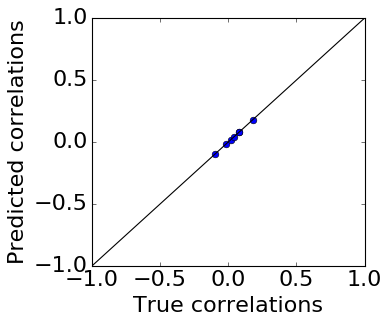

In [13]:
# Plot comparison of model results with the data.
fig,ax = plt.subplots(figsize=(4.4,4))
ax.plot(sisj,ising_eqn_3_sym.calc_observables(estMultipliers),'o')
ax.plot([-1,1],[-1,1],'k-')
ax.set(xlabel='True correlations',ylabel='Predicted correlations')

ValueError: Incompatible vector size. It must be a binomial coefficient n choose 2 for some integer n >= 2.

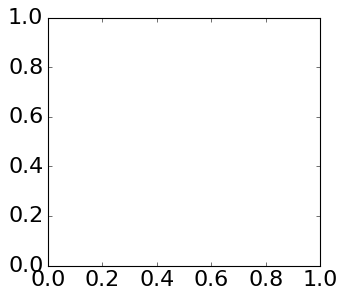

In [156]:
fig,ax = plt.subplots(figsize=(4.4,4))
jmx = abs(sisj[3:]).max()
cax = ax.matshow( squareform(sisj[3:]),cmap=plt.cm.seismic,vmin=-jmx,vmax=jmx )
fig.colorbar(cax,shrink=.9)

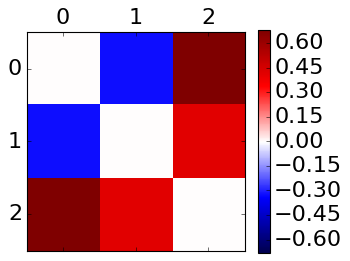

In [86]:
fig,ax = plt.subplots(figsize=(4.4,4))
jmx = abs(estMultipliers[3:]).max()
cax = ax.matshow( squareform(estMultipliers[3:]),cmap=plt.cm.seismic,vmin=-jmx,vmax=jmx )
fig.colorbar(cax,shrink=.9)